# Profit Analysis

## Overview

This project analyzes box office and streaming data to provide strategic direction for a newly formed movie division. Our analysis explores financial data, film ratings, and viewership data to help guide the division in deciding what types of movies to create.

## Business Problem

Microsoft is interested in entering the content creation space, and we need to use data insights to help them figure out how to launch their studio.

## Notebook Overview

Critical for any new business venture is to add value as quickly as possible. I have analyzed recent movie budgets compared to their domestic and global gross to help identify patterns.

In [123]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import datasets
domestic_profit = pd.read_csv('data/Edited Data/Domestic Profits.csv')
worldwide_profit = pd.read_csv('data/Edited Data/Worldwide Profits.csv')
movie_details = pd.read_csv('data/Provided Data/tmdb.movies.csv', index_col = 0, converters={'genre_ids': eval})
genres = pd.read_csv('data/edited data/tmdb genres.csv')

In [114]:
domestic_profit.head()

,release_date,movie,production_budget,domestic_gross,domestic_profit,domestic_ROI,Year
0,5/20/2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,-169536125,-41.289850,2011
1,6/7/2019,Dark Phoenix,350000000,42762350,-307237650,-87.782186,2019
2,5/1/2015,Avengers: Age of Ultron,330600000,459005868,128405868,38.840250,2015
3,12/15/2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,303181382,95.640815,2017
4,12/18/2015,Star Wars Ep. VII: The Force Awakens,306000000,936662225,630662225,206.098766,2015


In [115]:
domestic_profit.describe()

,production_budget,domestic_gross,domestic_profit,domestic_ROI,Year
count,2.194000e+03,2.194000e+03,2.194000e+03,2194.000000,2194.000000
mean,3.640526e+07,4.412024e+07,7.714979e+06,62.386500,2013.829535
std,5.149456e+07,7.979328e+07,5.464571e+07,614.768943,2.569796
min,1.400000e+03,0.000000e+00,-3.072376e+08,-100.000000,2010.000000
25%,4.400000e+06,9.762050e+04,-1.022759e+07,-97.950908,2012.000000
50%,1.600000e+07,1.279090e+07,-1.184654e+06,-38.399667,2014.000000
75%,4.200000e+07,5.332470e+07,1.284175e+07,58.714019,2016.000000
max,4.106000e+08,9.366622e+08,6.306622e+08,22664.410000,2019.000000


A quick look at the summary statistics for this data shows that the median "profit" for movies is a loss nearly $1.2 million. This highlights the importance of proceeding thoughtfully--it is just as easy to lose money as it is to make money! Let's take a look at the movies with the highest ROI to see if there are any similarities.

In [116]:
ROI = domestic_profit.sort_values(by='domestic_ROI', ascending=False).head(50)

In [117]:
ROI.describe()

,production_budget,domestic_gross,domestic_profit,domestic_ROI,Year
count,5.000000e+01,5.000000e+01,5.000000e+01,50.000000,50.000000
mean,4.286600e+06,6.151614e+07,5.722954e+07,2285.482842,2014.000000
std,5.818688e+06,6.066400e+07,5.544766e+07,3279.096953,2.490799
min,1.000000e+05,1.594798e+06,1.477486e+06,792.178750,2010.000000
25%,1.000000e+06,1.821323e+07,1.721323e+07,1085.530150,2012.000000
50%,2.750000e+06,4.947146e+07,4.547146e+07,1482.908075,2014.000000
75%,5.000000e+06,8.356042e+07,7.745095e+07,2031.971910,2016.000000
max,3.500000e+07,3.274817e+08,2.924817e+08,22664.410000,2018.000000


The films with the highest ROI have a mean budget of \\$4.3 million (significantly less than the mean of \\$36 million for the entire dataset!) and a median budget of \\$2.8 million (compared to a median budget of \\$16 million for the entire dataset!), indicating that modest budgets provide a greater return then big budget movies.

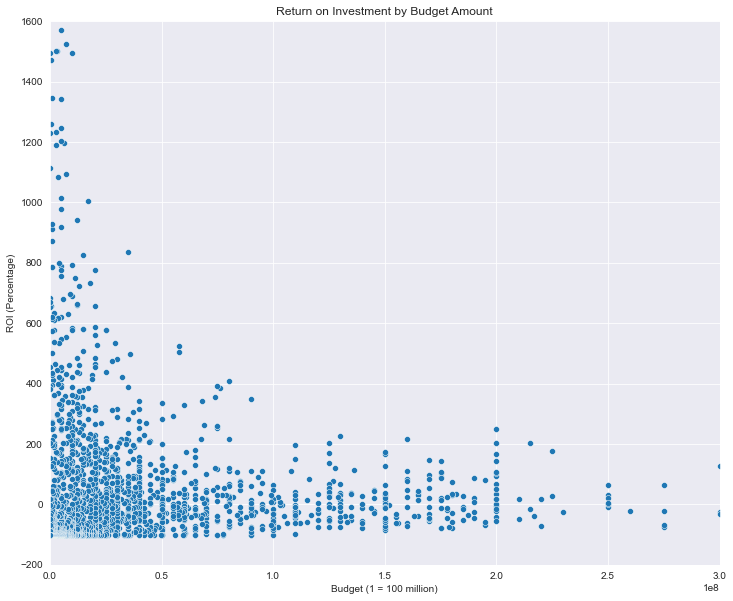

In [119]:
fig = plt.figure(figsize=(12,10))
plt.title('Return on Investment by Budget Amount')
plt.xlabel('Budget (1 = 100 million)')
plt.ylabel('ROI (Percentage)')
plt.ylim(-200, 1600)
plt.xlim(0, 300000000)
sns.set_style('darkgrid')
graph = sns.scatterplot(data=domestic_profit, x='production_budget', y='domestic_ROI');

Graphing all of our movie budgets gives us a similar picture! For movies with budgets over \\$100 million, ROI caps out around 250\%, but for movies with budgets less than \\$500,000, there is greater potential to make a larger return.

Let's look at the movies with the highest rate of return to see if we can find any similarities between them.

In [149]:
top_roi_details = ROI.merge(movie_details, how='inner', left_on='movie', right_on='title')
top_roi_details.drop_duplicates(subset=['movie'], inplace=True)

In [153]:
#define a function that counts the frequency of genres in the genre_id column
def genre_count(series):
    g = []
    genres = {}
    for i in series:
        g.extend(i)
    x = list(set(g))
    for i in x:
        genres[i] = 0
    for i in g:
        genres[i] += 1
    df = pd.DataFrame.from_dict(genres, orient='index')
    df.sort_values(by=0, inplace=True, ascending=False)
    return df

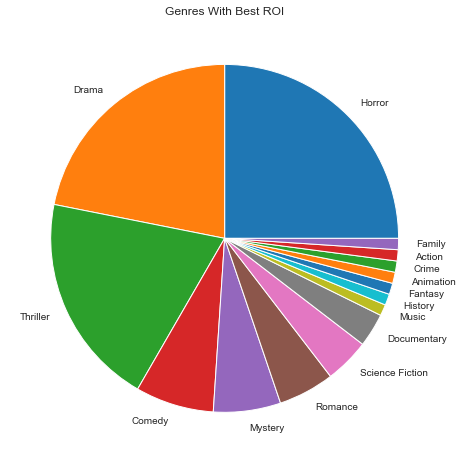

In [155]:
chart = genre_count(top_roi_details['genre_ids'])
chart = chart.merge(genres, left_index=True, right_on='id')
fig = plt.figure(figsize=(8,8))
plt.title('Genres With Best ROI')
plt.pie(chart[0], labels = chart['name']);

## Conclusions

Based on this data, my recommendations for Microsoft are:

- **Big budget does not equal big returns**. Movies with a budget less than $500,000 are where you are able to get a really high rate of return.

## Next Steps

Further insi